In [1]:
import dotenv
dotenv.load_dotenv()

True

In [2]:
from IPython.display import Image

In [3]:
llm_config={"model": "gpt-3.5-turbo"}

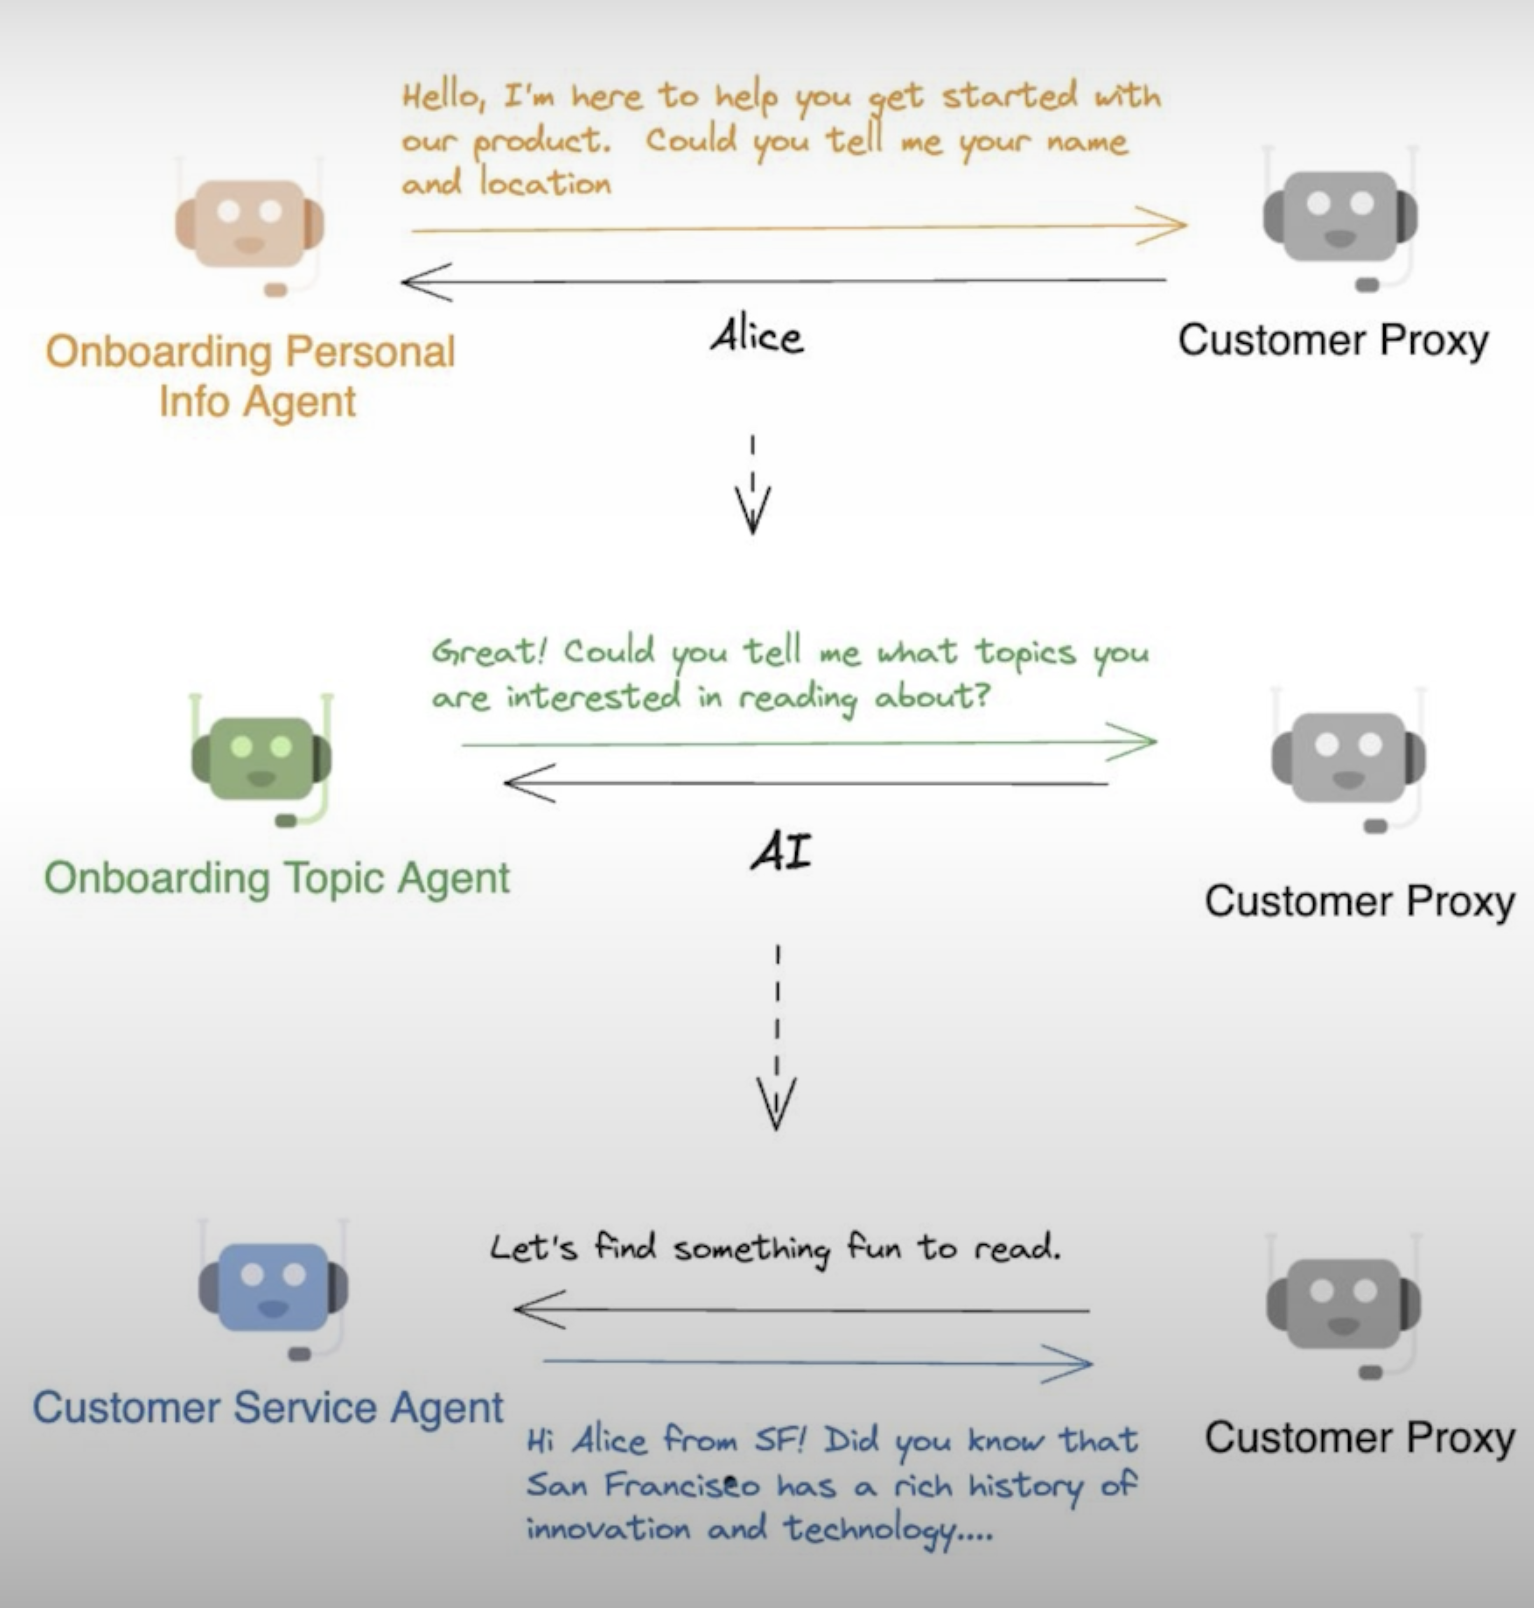

In [4]:
Image("img/002.agents.png")

In [5]:
from autogen import ConversableAgent

In [6]:
onboarding_personal_information_agent = ConversableAgent(
    name="Onboarding Personal Information Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's name and location.
    Do not ask for other information. Return 'TERMINATE' 
    when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [7]:
onboarding_topic_preference_agent = ConversableAgent(
    name="Onboarding Topic preference Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's preferences on news topics.
    Do not ask for other information.
    Return 'TERMINATE' when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [8]:
customer_engagement_agent = ConversableAgent(
    name="Customer Engagement Agent",
    system_message='''You are a helpful customer service agent
    here to provide fun for the customer based on the user's
    personal information and topic preferences.
    This could include fun facts, jokes, or interesting stories.
    Make sure to make it engaging and fun!
    Return 'TERMINATE' when you are done.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

In [9]:
customer_proxy_agent = ConversableAgent(
    name="customer_proxy_agent",
    llm_config=False,
    code_execution_config=False,
    human_input_mode="ALWAYS",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

In [10]:
chats = [
    {
        "sender": onboarding_personal_information_agent,
        "recipient": customer_proxy_agent,
        "message": 
            "Hello, I'm here to help you get started with our product."
            "Could you tell me your name and location?",
        "summary_method": "reflection_with_llm",
        "summary_args": {
            "summary_prompt" : "Return the customer information "
                             "into as JSON object only: "
                             "{'name': '', 'location': ''}",
        },
        "max_turns": 2,
        "clear_history" : True
    },
    {
        "sender": onboarding_topic_preference_agent,
        "recipient": customer_proxy_agent,
        "message": 
                "Great! Could you tell me what topics you are "
                "interested in reading about?",
        "summary_method": "reflection_with_llm",
        "max_turns": 1,
        "clear_history" : False
    },
    {
        "sender": customer_proxy_agent,
        "recipient": customer_engagement_agent,
        "message": "Let's find something fun to read.",
        "max_turns": 1,
        "summary_method": "reflection_with_llm",
    },
]

In [12]:
from autogen import initiate_chats

chat_results = initiate_chats(chats)


********************************************************************************
Starting a new chat....

********************************************************************************
Onboarding Personal Information Agent (to customer_proxy_agent):

Hello, I'm here to help you get started with our product.Could you tell me your name and location?

--------------------------------------------------------------------------------
customer_proxy_agent (to Onboarding Personal Information Agent):

Alex

--------------------------------------------------------------------------------
Onboarding Personal Information Agent (to customer_proxy_agent):

Thank you, and may I know your location please?

--------------------------------------------------------------------------------
customer_proxy_agent (to Onboarding Personal Information Agent):

Alex, Beer Sheva

--------------------------------------------------------------------------------

**************************************************

In [13]:
for chat_result in chat_results:
    print(chat_result.summary)
    print("\n")

{
  "name": "Alex",
  "location": "Beer Sheva"
}


Alex from Beer Sheva is interested in reading about the city.


Alex from Beer Sheva is interested in reading about the city, which is one of the oldest in the world with over 7,000 years of history. He can explore the ancient ruins and modern side of Beer Sheva for a fun reading experience.


In [14]:
for chat_result in chat_results:
    print(chat_result.cost)
    print("\n")

{'usage_including_cached_inference': {'total_cost': 0.00025850000000000005, 'gpt-3.5-turbo-0125': {'cost': 0.00025850000000000005, 'prompt_tokens': 355, 'completion_tokens': 54, 'total_tokens': 409}}, 'usage_excluding_cached_inference': {'total_cost': 0.000193, 'gpt-3.5-turbo-0125': {'cost': 0.000193, 'prompt_tokens': 257, 'completion_tokens': 43, 'total_tokens': 300}}}


{'usage_including_cached_inference': {'total_cost': 0.0001335, 'gpt-3.5-turbo-0125': {'cost': 0.0001335, 'prompt_tokens': 183, 'completion_tokens': 28, 'total_tokens': 211}}, 'usage_excluding_cached_inference': {'total_cost': 0.0001335, 'gpt-3.5-turbo-0125': {'cost': 0.0001335, 'prompt_tokens': 183, 'completion_tokens': 28, 'total_tokens': 211}}}


{'usage_including_cached_inference': {'total_cost': 0.0006735, 'gpt-3.5-turbo-0125': {'cost': 0.0006735, 'prompt_tokens': 594, 'completion_tokens': 251, 'total_tokens': 845}}, 'usage_excluding_cached_inference': {'total_cost': 0.0006735, 'gpt-3.5-turbo-0125': {'cost': 0.000